In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display
from numpy import dstack

In [23]:
plt.style.use('bmh')
Raw_data_paths = ''
fileNames = ["iPhone7 200205 15_10_12.csv", # Walking, running, s
 "iPhone7 200205 15_10_48.csv",
 "iPhone7 200205 15_11_42.csv",
 "iPhone7 200205 15_12_47.csv",
 "iPhone7 200205 15_13_46.csv",
 "iPhone7 200205 15_14_49.csv",
 "iPhone7 200205 15_15_59.csv",
 "iPhone7 200205 15_17_53.csv",
 "iPhone7 200205 15_19_46.csv",
 "iPhone7 200205 15_21_40.csv",
 "iPhone7 200205 15_23_51.csv",
 "iPhone7 200205 15_24_34.csv",
 "iPhone7 200205 15_26_06.csv",
 "iPhone7 200205 15_27_50.csv",
 "iPhone7 200205 15_30_16.csv",
 "iPhone7 200205 15_30_58.csv",
 "iPhone7 200205 15_31_27.csv",
 "iPhone7 200205 15_31_55.csv",
 "iPhone7 200205 15_33_21.csv",
 "iPhone7 200205 15_34_57.csv",
 "iPhone7 200205 15_45_20.csv",
 "iPhone7 200205 15_47_09.csv",
 "iPhone7 200205 15_49_17.csv",
 "iPhone7 200205 15_49_46.csv",
 "iPhone7 200205 15_50_37.csv",
 "iPhone7 200205 15_52_06.csv",
 "iPhone7 200205 15_54_04.csv",
 "iPhone7 200205 15_55_43.csv",
 "iPhone7 200205 15_56_11.csv",
 "iPhone7 200205 15_57_08.csv",
 "iPhone7 200205 15_58_21.csv",
 "iPhone7 200205 15_58_41.csv",
 "iPhone7 200205 16_11_12.csv",
 "iPhone7 200205 16_12_04.csv",
 "iPhone7 200205 16_13_51.csv",
 "iPhone7 200205 16_13_51.csv",
 "iPhone7 200205 16_14_57.csv",
 "iPhone7 200205 16_16_08.csv",
 "iPhone7 200205 16_17_04.csv",
 "iPhone7 200205 16_18_16.csv",
 "iPhone7 200205 16_19_01.csv",
 "iPhone7 200205 16_19_50.csv",
 "iPhone7 200205 16_20_32.csv",
 "iPhone7 200205 16_22_25.csv",
 "iPhone7 200205 16_23_09.csv", # Walking, running, s
 "iPhone7 200205 18_57_47.csv", # Walking, running, s
 "iPhone7 200224 16_16_57.csv", # Falling (the first)
 "iPhone7 200224 16_17_31.csv",
 "iPhone7 200224 16_18_01.csv",
 "iPhone7 200224 16_18_26.csv",
 "iPhone7 200224 16_18_52.csv",
 "iPhone7 200224 16_19_11.csv", # Falling (the end)
 "iPhone7 200224 18_38_14.csv", # Car (the first)
 "iPhone7 200224 18_39_57.csv",
 "iPhone7 200224 18_40_58.csv",
 "iPhone7 200224 18_42_05.csv",
 "iPhone7 200224 18_43_14.csv",
 "iPhone7 200224 18_44_20.csv",
 "iPhone7 200224 18_45_50.csv",
 "iPhone7 200224 18_47_08.csv",
 "iPhone7 200224 18_48_20.csv",
 "iPhone7 200224 18_49_33.csv",
 "iPhone7 200224 18_50_39.csv",
 "iPhone7 200224 18_53_33.csv", # Car (the end)
 "iPhone7 200314 17_31_05.csv", # Cat stairs
 "iPhone7 200314 17_36_43.csv", # Round stairs down
 "iPhone7 200314 17_38_06.csv"] # Round stairs up
labels_name = ["Standing",
 "Standing",
 "Walking",
 "Walking",
 "Walking",
 "Walking",
 "Walking",
 "Walking",
 "Walking",
 "Walking",
 "Running",
 "Running",
 "Running",
 "Running",
 "Running",
 "Elevator",
 "Elevator",
 "Elevator",
 "Elevator",
 "upstairs",
 "downstairs",
 "downstairs",
 "upstairs",
 "Standing",
 "Standing",
 "Walk irregularly, go downstairs straight middle, walk irregularly from floor 2 to 1",
 "Walk irregularly, go upstairs straight middle, walkirregularly from floor 1 to 2",
 "Walk irregularly, go downstairs straight middle, walk irregularly from floor 2 to 0",
 "Standing",
 "Standing",
 "Walk irregularly, go downstairs straight middle, walk irregularly from floor 0 to -1",
 "Standing",
 "Standing",
 "Walk irregularly, go upstairs straight middle, walkirregularly from floor -1 to 0",
 "Walk irregularly, go upstairs straight middle, walkirregularly from floor 0 to 2",
 "Walk irregularly, elevator down, walk irregularly from floor 2 to 1",
 "Walk irregularly, elevator up, walk irregularly from floor 1 to 2",
 "Walk irregularly, elevator down, walk irregularly from floor 2 to -1",
 "Walk irregularly, elevator up, walk irregularly from floor -1 to 2",
 "Walk straight, run straight at floor 2",
 "Walk straight, run straight at floor 2",
 "Run straight, walk straight at floor 2",
 "Run straight, walk straight at floor 2",
 "Stand, run straight, stand at floor 2",
 "Stand, run straight, stand at floor 2",
 "Every motion included with a sound recording",
 "Falling",
 "Falling",
 "Falling",
 "Falling",
 "Falling",
 "Falling",
 "Falling",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Car",
 "Going upstairs and downstairs from a cat stairs several times",
 "downstairs",
 "upstairs"]
LABELS = [
    "Walking", 
    "upstairs", 
    "downstairs", 
    "Standing",
    "Running",
    "Elevator",
    "Falling",
    "Car"
]
dataAcceleration = pd.DataFrame()
dataGyro = pd.DataFrame()
dataMag = pd.DataFrame()
i = 0
columnNames = ["accelerometerAccelerationX", "accelerometerAccelerationY", "accelerometerAccelerationZ",
              "motionRotationRateX", "motionRotationRateY", "motionRotationRateZ","motionMagneticFieldX",
              "motionMagneticFieldY","motionMagneticFieldZ"]
label_Index = np.empty([50,2],dtype=int)
lasatFirstIndex = 0
labels_seq = pd.DataFrame(columns=['label','index1','index2'],index=range(50))
for name in labels_name:
    if name in LABELS:
        #print(fileNames[labels_name.index(name)])
        i = i+1
        frame = pd.read_csv(fileNames[labels_name.index(name)])
        frameAcc = frame[['accelerometerAccelerationX', 'accelerometerAccelerationY', 'accelerometerAccelerationZ']]
        frameGyro = frame[['motionRotationRateX', 'motionRotationRateY', 'motionRotationRateZ']]
        frameMag = frame[['motionMagneticFieldX', 'motionMagneticFieldY', 'motionMagneticFieldZ']]
        dataAcceleration = pd.concat([dataAcceleration, frameAcc], ignore_index =True)
        dataGyro = pd.concat([dataGyro, frameGyro],ignore_index = True)
        dataMag = pd.concat([dataMag, frameMag], ignore_index = True)
        label_Index[i-1] = [lasatFirstIndex, lasatFirstIndex + frameGyro.index[-1]]
        label = 9
        if name == "Walking":
            label = 0
        elif name == "downstairs":
            label = 1
        elif name == "upstairs":
            label = 2
        elif name == "Standing":
            label = 3
        elif name == "Running":
            label = 4
        elif name == "Elevator":
            label = 5
        elif name == "Falling":
            label = 6
        elif name == "Car":
            label = 7
        labels_seq.loc[i-1,'label'] = label+1
        labels_seq.loc[i-1,'index1'] = lasatFirstIndex
        labels_seq.loc[i-1,'index2'] = lasatFirstIndex + frameGyro.index[-1]
        lasatFirstIndex = lasatFirstIndex + frameGyro.index[-1] + 1
data_Acceleration = dataAcceleration.values # To stack each of the loaded 3D arrays into a single 3D array
display(data_Acceleration.shape)
display(dataAcceleration.head())
data_Gyro = dataGyro.values
print(data_Gyro.shape)
display(dataGyro.head())
data_Magn = dataMag.values
print(data_Magn.shape)
display(dataMag.head())
print("Labels: ",LABELS)
display(labels_seq.head(5))
display(labels_seq.loc[labels_seq['label'] >= 9,:])
minAcc =  np.amin(data_Acceleration)
MaxAcc = np.amax(data_Acceleration)
minGyro =  np.amin(data_Gyro)
MaxGyro = np.amax(data_Gyro)
minMagn =  np.amin(data_Magn)
MaxMagn = np.amax(data_Magn)
data_normalizeAcc = (data_Acceleration - minAcc)/(MaxAcc - minAcc)
data_normalizeGyro = (data_Gyro - minGyro)/(MaxGyro - minGyro)
data_normalizeMagn = (data_Magn - minMagn)/(MaxMagn - minMagn)

(173258, 3)

,accelerometerAccelerationX,accelerometerAccelerationY,accelerometerAccelerationZ
0,0.971985,0.060410,-0.145355
1,0.968735,0.061127,-0.146179
2,0.968292,0.062897,-0.145157
3,0.969849,0.062836,-0.143326
4,0.969116,0.062683,-0.144608


(173258, 3)


,motionRotationRateX,motionRotationRateY,motionRotationRateZ
0,-0.007794,0.008071,-0.008198
1,-0.005893,0.011940,-0.006643
2,-0.006819,0.009070,-0.005897
3,-0.006794,0.006296,-0.005899
4,-0.005874,0.003388,-0.001557


(173258, 3)


,motionMagneticFieldX,motionMagneticFieldY,motionMagneticFieldZ
0,42.354126,-8.236511,-36.237732
1,42.488953,-8.210075,-36.202393
2,42.488953,-8.210075,-36.202393
3,42.517212,-8.135635,-36.181335
4,42.517212,-8.135635,-36.181335


Labels:  ['Walking', 'upstairs', 'downstairs', 'Standing', 'Running', 'Elevator', 'Falling', 'Car']


,label,index1,index2
0,4,0,3220
1,4,3221,6441
2,1,6442,9591
3,1,9592,12741
4,1,12742,15891


,label,index1,index2


In [24]:
sampling_freq = 50

def visualize_triaxial_signals(data,title,width,height):
    
    start_point = 500
                    
    end_point=10000
            
    X_component=data[range(start_point,end_point),0] # copy acc_X
    Y_component=data[range(start_point,end_point),1] # copy acc_X
    Z_component=data[range(start_point,end_point),2] # copy acc_X
    legend_X='acc_X'
    legend_Y='acc_Y'
    legend_Z='acc_Z'
    colors=['r','b','g']
    figure_Ylabel='Acceleration in 1g'
        
    len_df=len(range(start_point,end_point)) # number of rows in this dataframe to be visualized(depends on 'act' variable)
    
    # converting row numbers into time duration (the duration between two rows is 1/50=0.02 second)
    time=[1/float(sampling_freq) *j for j in range(len_df)]
    
    # Define the figure and setting dimensions width and height
    fig = plt.figure(figsize=(width,height))
    
    # ploting each signal component
    _ =plt.plot(time,X_component,color='r',label=legend_X)
    _ =plt.plot(time,Y_component,color='b',label=legend_Y)
    _ =plt.plot(time,Z_component,color='g',label=legend_Z)
    
    # Set the figure info defined earlier
    _ = plt.ylabel(figure_Ylabel) # set Y axis info 
    _ = plt.xlabel('Time in seconds (s)') # Set X axis info (same label in all cases)
    _ = plt.title(title) # Set the title of the figure
    
    # localise the figure's legends
    _ = plt.legend(loc="upper left")# upper left corner
    
    # showing the figure
    plt.show()

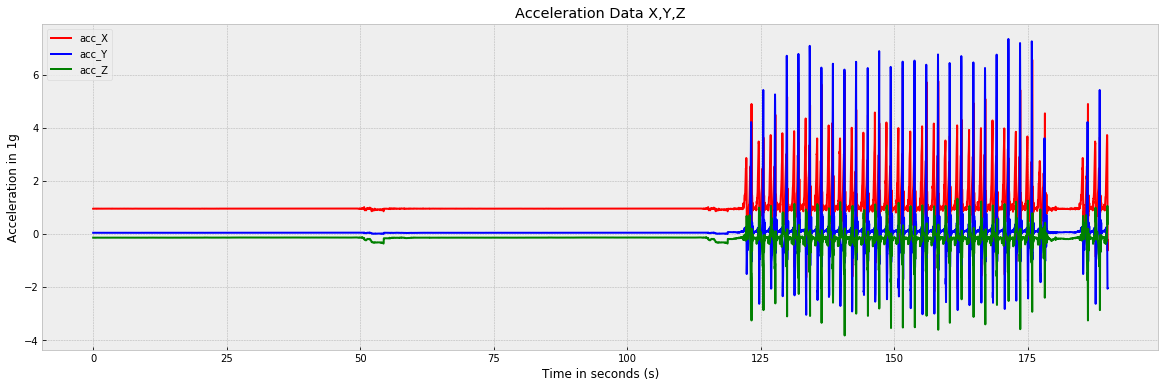

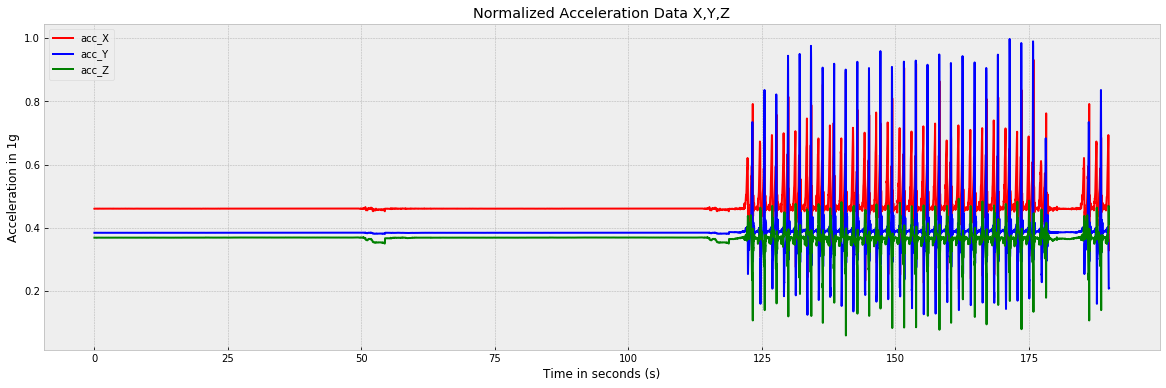

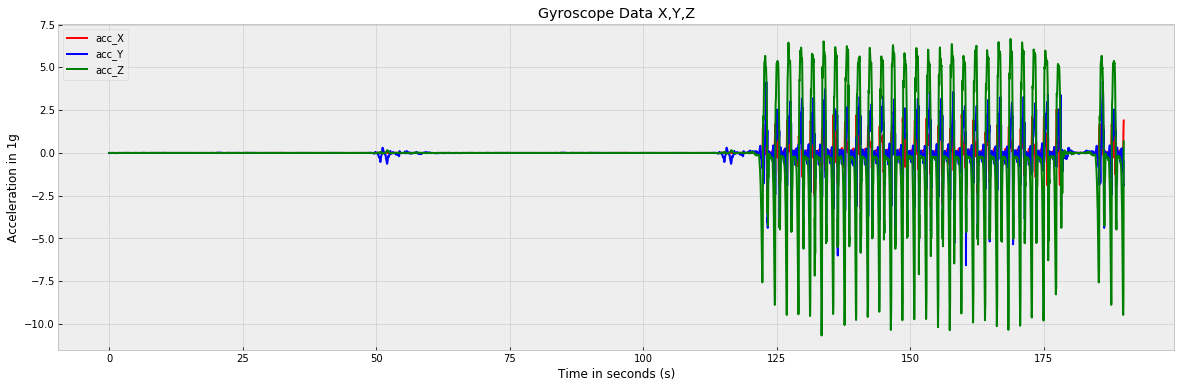

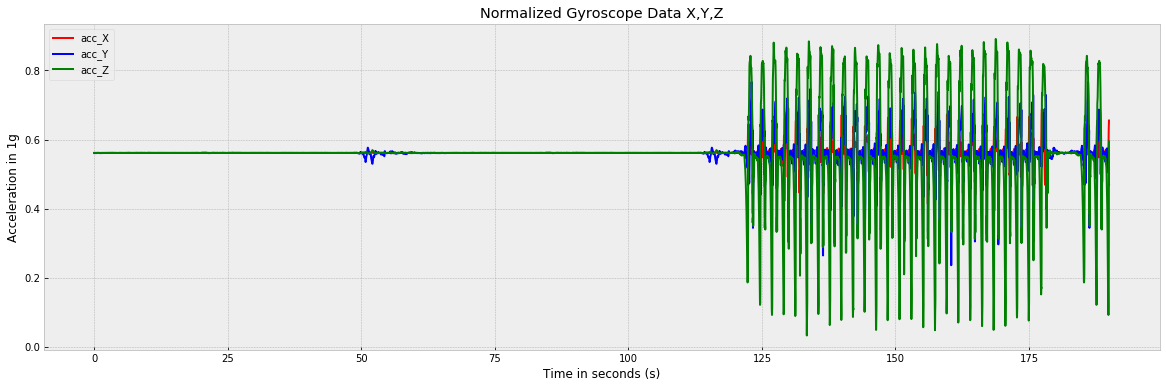

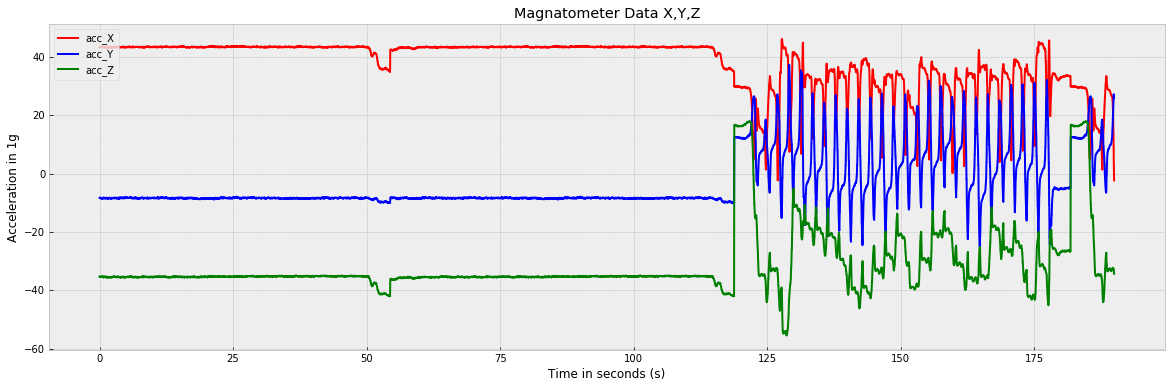

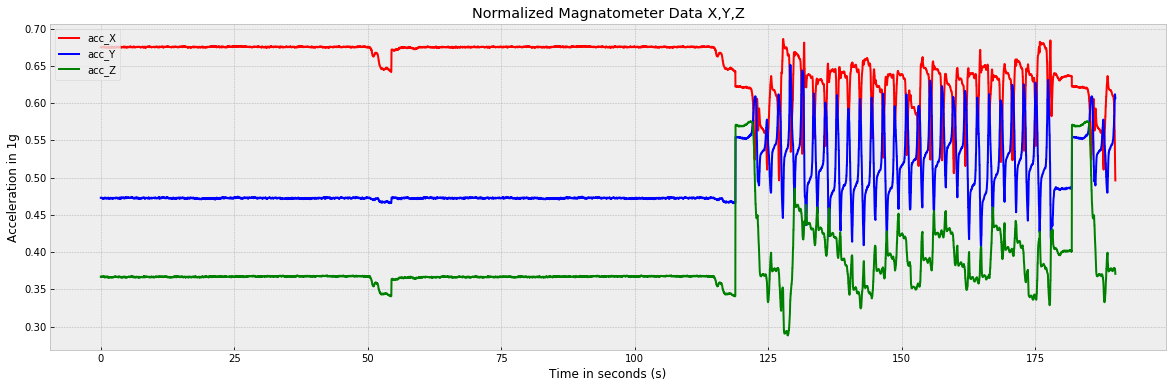

In [27]:
visualize_triaxial_signals(data_Acceleration, "Acceleration Data X,Y,Z",20,6)
visualize_triaxial_signals(data_normalizeAcc, "Normalized Acceleration Data X,Y,Z",20,6)
visualize_triaxial_signals(data_Gyro, "Gyroscope Data X,Y,Z",20,6)
visualize_triaxial_signals(data_normalizeGyro, "Normalized Gyroscope Data X,Y,Z",20,6)
visualize_triaxial_signals(data_Magn, "Magnatometer Data X,Y,Z",20,6)
visualize_triaxial_signals(data_normalizeMagn, "Normalized Magnatometer Data X,Y,Z",20,6)

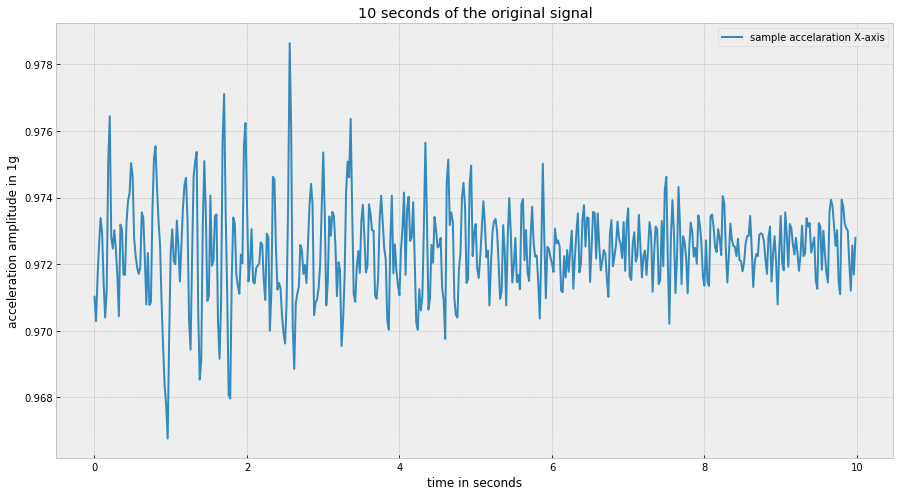

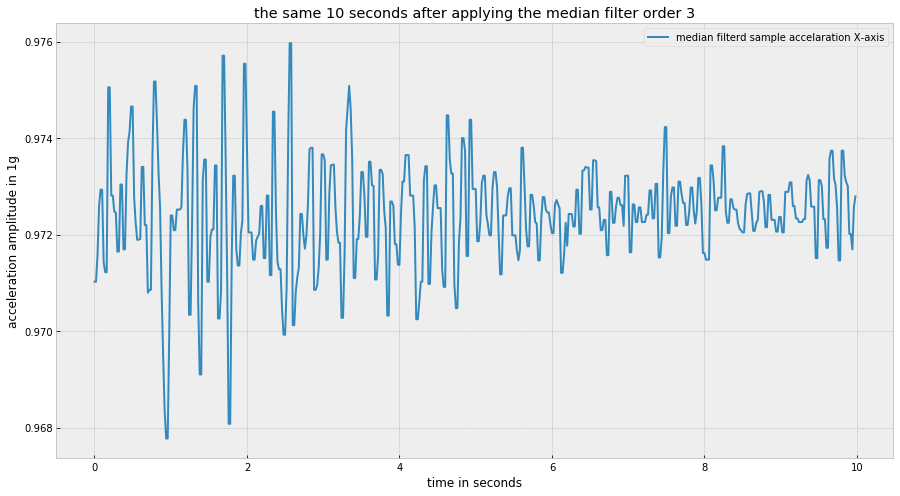

In [28]:

def visualize_signal(signal, x_labels, y_labels, title, legend):
    plt.figure(figsize=(15, 8))
    time = [1 / float(sampling_freq) * i for i in range(len(signal))]  # convert row numbers in time durations
    # plotting the signal
    plt.plot(time, signal, label=legend)  # plot the signal and add the legend
    plt.xlabel(x_labels)
    plt.ylabel(y_labels)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()  # show the figure
from scipy.signal import medfilt  # import the median filter function


def median(signal):  # input: numpy array 1D (one column)
    array = np.array(signal)
    # applying the median filter
    med_filtered = sp.signal.medfilt(array, kernel_size=3)  # 3rd order median filter
    return med_filtered  # return the med-filtered signal: numpy array 1D


legend1 = 'sample accelaration X-axis'
legend2 = 'median filterd sample accelaration X-axis'
x_labels = 'time in seconds'
y_labels = 'acceleration amplitude in 1g'
title1 = '10 seconds of the original signal'
title2 = 'the same 10 seconds after applying the median filter order 3'
signal_sample = data_Acceleration[:,0]
med_filtred_signal = median(signal_sample)
visualize_signal(signal_sample[300:800],x_labels,y_labels,title1,legend1)
visualize_signal(med_filtred_signal[300:800],x_labels,y_labels,title2,legend2)

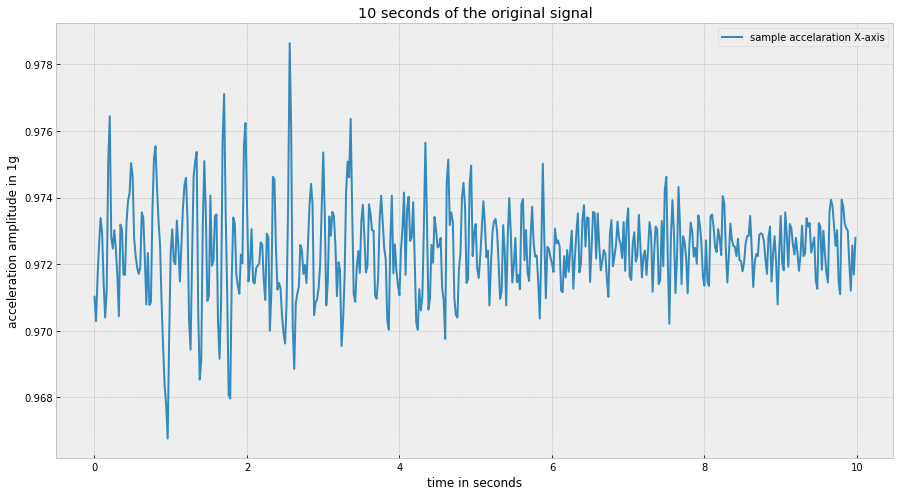

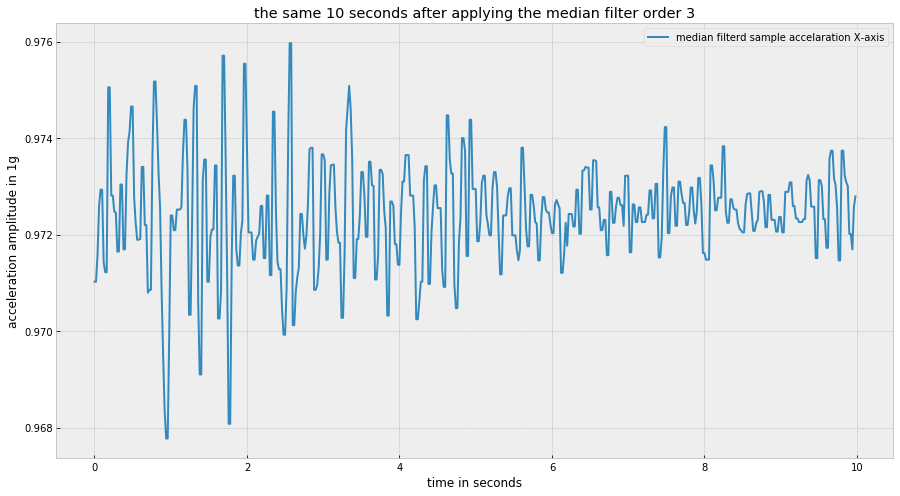

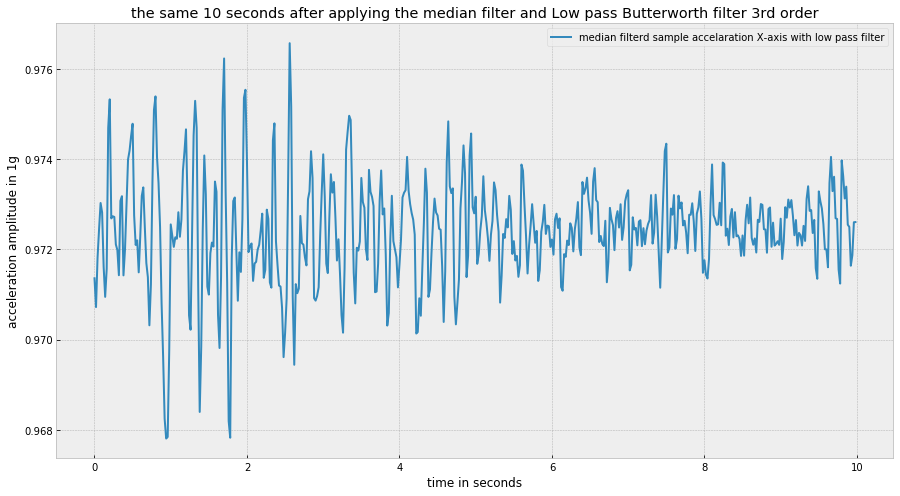

'the shape of the first dataframe: '

(173257, 12)

"dataframe's statistics: "

,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,total_acc_X,total_acc_Y,total_acc_Z,t_body_magn_X,t_body_magn_Y,t_body_magn_Z
count,1.732570e+05,1.732570e+05,1.732570e+05,1.732570e+05,1.732570e+05,1.732570e+05,173257.000000,173257.000000,173257.000000,173257.000000,173257.000000,173257.000000
mean,2.845541e-07,-2.918091e-07,5.662079e-07,-3.282222e-07,-4.175662e-07,1.589193e-07,1.069547,0.133621,-0.102567,-0.000017,-0.000019,-0.000053
std,5.047993e-01,7.293341e-01,3.316722e-01,6.638439e-01,1.016064e+00,2.235013e+00,0.574571,0.756151,0.358218,7.351367,7.965716,5.671162
min,-4.252342e+00,-3.261752e+00,-3.364687e+00,-8.480935e+00,-8.480510e+00,-1.137011e+01,-3.307916,-3.759041,-3.578281,-61.451645,-98.449533,-76.353974
25%,-8.344894e-02,-1.239705e-01,-3.940340e-02,-4.724688e-02,-1.132848e-01,-1.788695e-01,0.947021,0.012564,-0.173907,-0.981831,-1.915189,-1.466275
50%,-1.760570e-03,-6.093745e-03,-1.220208e-04,1.142479e-03,-3.505349e-03,-1.884385e-03,0.973004,0.063868,-0.117615,0.146253,-0.100702,-0.000975
75%,3.592105e-02,8.174106e-03,3.537707e-02,6.523443e-02,4.742681e-02,7.702106e-02,1.024329,0.135632,-0.027548,2.289264,1.202277,1.482731
max,4.512133e+00,6.997468e+00,3.476376e+00,6.905882e+00,7.617572e+00,8.252823e+00,5.319645,7.248285,3.495613,52.981213,109.841989,96.208106


,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,total_acc_X,total_acc_Y,total_acc_Z,t_body_magn_X,t_body_magn_Y,t_body_magn_Z
0,-0.006597,-0.010025,0.035795,0.061058,0.079762,-0.010138,0.962529,0.067428,-0.163866,-2.089139,-5.086611,-8.376903
1,0.004907,-0.022486,0.068029,0.058959,0.074771,-0.008324,0.973759,0.055350,-0.129985,-3.076890,-7.013608,-12.286779
2,-0.003249,-0.011436,0.040886,0.059568,0.072429,-0.010066,0.965304,0.066802,-0.155504,-1.973868,-5.230459,-8.595079


In [47]:
# signal processing part 
nyqRate = sampling_freq / float(2)
freq1 = 0.3  # filter cutoff freq, to remove DC componant as specified in the data set
freq2 = 20  # filter cutoff frq, for body componant
from scipy.fftpack import fft


def filtering_and_extraction(signalT, freq1, freq2):
    signalT = np.array(signalT)
    signalT_length = len(signalT)
    signalF = fft(signalT)
    allFreqs = np.array(
        sp.fftpack.fftfreq(signalT_length, d=1/float(sampling_freq)))  # return all freq in range of (-25Hz, 25Hz)
    bodySignalF = []
    noiseF = []
    DC_valueF = []
    for i in range(len(allFreqs)):
        if(abs(allFreqs[i]) > freq1):
            DC_valueF.append(float(0))
        else:
            DC_valueF.append(signalF[i])
        if abs(allFreqs[i]) <= freq1 or abs(allFreqs[i]) > freq2:
            bodySignalF.append(float(0))
        else:
            bodySignalF.append(signalF[i])
        if abs(allFreqs[i]) <= freq2:
            noiseF.append(float(0))
        else:
            noiseF.append(signalF[i])
    DC_valueT = sp.fftpack.ifft(np.array(DC_valueF)).real
    bodySignalT = sp.fftpack.ifft(np.array(bodySignalF)).real
    noiseT = sp.fftpack.ifft(np.array(noiseF)).real
    totalAcceleration = signalT - noiseT
    return (totalAcceleration, bodySignalT, noiseT,DC_valueT)


filtred_signal, _, _,DC_siganl = filtering_and_extraction(med_filtred_signal, freq1, freq2)
legend3 = 'median filterd sample accelaration X-axis with low pass filter'
title3 = 'the same 10 seconds after applying the median filter and Low pass Butterworth filter 3rd order'
visualize_signal(signal_sample[300:800],x_labels,y_labels,title1,legend1)
visualize_signal(med_filtred_signal[300:800],x_labels,y_labels,title2,legend2)
visualize_signal(filtred_signal[300:800],x_labels,y_labels,title3,legend3)
# apply the 3rd order median and  filtering to raw data gyro and accel
timeSignalAll = pd.DataFrame()
accCol = ['acc_X','acc_Y','acc_Z'];
groCol = ['gyro_X','gyro_Y','gyro_Z'];
magnCol = ['magn_X','magn_Y','magn_Z'];
for column in range(3):
    eachAxisSignal = np.array(data_Acceleration[:,column])
    medianFilteredSignal = median(eachAxisSignal)  # apply 3rd order median filter
    totalAcc, bodyAcc, _,_ = filtering_and_extraction(medianFilteredSignal, freq1, freq2)  # seperate the body componant
    timeSignalAll['t_body_' + accCol[column]] = bodyAcc[:-1]
    timeSignalAll['total_' + accCol[column]] = totalAcc[:-1]
for column in range(3):
    eachAxisSignalGyro = np.array(data_Gyro[:,column])
    medianFilteredSignalGyro = median(eachAxisSignalGyro)
    _, bodyGyro, _,_ = filtering_and_extraction(medianFilteredSignalGyro, freq1, freq2)
    timeSignalAll['t_body_' + groCol[column]] = bodyGyro[:-1]
for column in range(3):
    eachAxisSignalMagn = np.array(data_Magn[:,column])
    medianFilteredSignalMagn = median(eachAxisSignalMagn)
    _, bodyMagn, _,_ = filtering_and_extraction(medianFilteredSignalMagn, freq1, freq2)
    timeSignalAll['t_body_' + magnCol[column]] = bodyMagn[:-1]
newOrderColumn = ['t_body_acc_X', 't_body_acc_Y', 't_body_acc_Z', 't_body_gyro_X', 't_body_gyro_Y', 't_body_gyro_Z',
                  'total_acc_X', 'total_acc_Y', 'total_acc_Z','t_body_magn_X','t_body_magn_Y','t_body_magn_Z']
timeSignalAllOrdered = pd.DataFrame()
for column in newOrderColumn:
    timeSignalAllOrdered[column] = timeSignalAll[column]
display("the shape of the first dataframe: ",timeSignalAllOrdered.shape)  # the of the first dataframe
display("dataframe's statistics: ", timeSignalAllOrdered.describe())  # dataframe's statistics
timeSignalAllOrdered.head(3)  # displaying the fisrt three rows


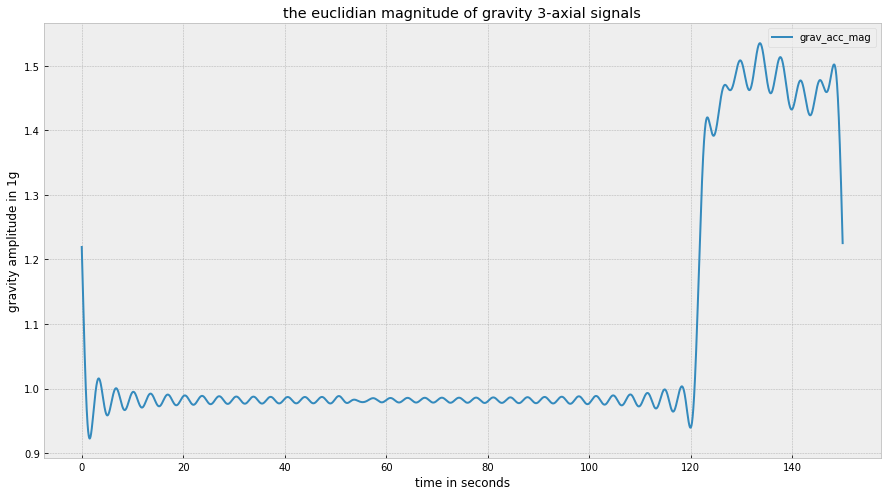

mean value = 1.072 g


In [39]:
import math
def mag_3_signals(x,y,z): # Euclidian magnitude
    return [math.sqrt((x[i]**2+y[i]**2+z[i]**2)) for i in range(len(x))]
def verify_gravity():        
    start_point = 500
                    
    end_point=8000
            
    acc_x=data_Acceleration[range(start_point,end_point),0] # copy acc_X
    acc_y=data_Acceleration[range(start_point,end_point),1] # copy acc_X
    acc_z=data_Acceleration[range(start_point,end_point),2] # copy acc_X
    # apply the filtering method to acc_[X,Y,Z] and store gravity components
    _,_,_,grav_acc_X=filtering_and_extraction(acc_x,freq1,freq2)
    _,_,_,grav_acc_Y=filtering_and_extraction(acc_y,freq1,freq2)
    _,_,_,grav_acc_Z=filtering_and_extraction(acc_z,freq1,freq2)
    
    # calculating gravity magnitude signal
    grav_acc_mag=mag_3_signals(grav_acc_X, grav_acc_Y,grav_acc_Z)

    x_labels='time in seconds' # Set x axis info
    y_labels='gravity amplitude in 1g' # set y axis info
    title='the euclidian magnitude of gravity 3-axial signals' # set the figure's title
    legend='grav_acc_mag' # set the figure's legend
    
    visualize_signal(grav_acc_mag,x_labels,y_labels,title,legend) # visualize gravity magnitude signal
    print('mean value = '+str(np.array(grav_acc_mag).mean())[0:5]+ ' g') # print the gravity magnitude mean value
verify_gravity()

In [50]:
# Windowing

def normalize5(number):
    stre = str(number)
    if len(stre) < 5:
        l = len(stre)
        for i in range(0, 5 - l):
            stre = "0" + stre
    return stre


def normalize2(number):
    stre = str(number)
    if len(stre) < 2:
        stre = "0" + stre
    return stre


windowedLabels = []


def windowing(timeSignals, labels):
    columns = timeSignals.columns
    windowedSignals = {}
    windowID = 0
    labelArray = np.array(labels[labels['label'] < 9])
    for line in labelArray:
        activityID = line[0]
        starting = line[1]
        ending = line[2]
        for cursor in range(starting, ending - 127, 64):
            endPoint = cursor + 128
            data = np.array(timeSignals.iloc[cursor:endPoint])
            window = pd.DataFrame(data=data, columns=columns)
            key = 't_W' + normalize5(windowID) + '_act' + normalize2(activityID)
            windowedSignals[key] = window
            windowID = windowID + 1
            windowedLabels.append(activityID)
    return windowedSignals

t_windowedSignal = windowing(timeSignalAllOrdered, labels_seq)
display(t_windowedSignal['t_W00081_act04'].head(128))
print(t_windowedSignal['t_W00081_act04'].shape)
# print(list(t_windowedSignal.keys()))
print(len(t_windowedSignal))
print(len(windowedLabels))
windLabel_dataframe = pd.DataFrame(windowedLabels, columns=['Labels'])
path1 = "New Data\\After processing\\labels.csv"
windLabel_dataframe.to_csv(path_or_buf=path1, na_rep='NaN', columns=None, header=False, index=False, mode='w',
                           encoding='utf-8', line_terminator='\n', )

,t_body_acc_X,t_body_acc_Y,t_body_acc_Z,t_body_gyro_X,t_body_gyro_Y,t_body_gyro_Z,total_acc_X,total_acc_Y,total_acc_Z,t_body_magn_X,t_body_magn_Y,t_body_magn_Z
0,0.000477,-0.003562,0.004690,-0.009857,0.005293,-0.016788,0.972990,0.061382,-0.114901,-0.208754,-0.086202,-0.537276
1,0.001960,-0.002804,0.002646,-0.010376,0.008612,-0.014032,0.974515,0.061906,-0.116855,-0.214611,-0.108533,-0.566742
2,0.000412,-0.002791,0.002663,-0.010575,0.004277,-0.017913,0.973008,0.061679,-0.116744,-0.011984,0.056050,-0.724650
3,0.000520,-0.002086,0.003192,-0.011111,0.007189,-0.015750,0.973158,0.062141,-0.116118,-0.002880,0.066807,-0.750217
4,0.001504,-0.002386,0.001109,-0.009735,0.005778,-0.016172,0.974185,0.061594,-0.118101,-0.114504,-0.000934,-0.582870
...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000447,-0.005689,0.002978,-0.004686,-0.005655,0.002877,0.972956,0.062213,-0.115938,0.255320,0.137379,0.193469
124,0.001199,-0.006482,0.001058,-0.005024,-0.008086,0.001661,0.973696,0.061583,-0.117960,0.239029,0.140392,0.178741
125,0.000024,-0.006229,0.003081,-0.006876,-0.009626,-0.000706,0.972510,0.061992,-0.116038,0.374506,0.183655,0.100873
126,0.001354,-0.006502,0.001298,-0.006018,-0.006509,0.001870,0.973829,0.061866,-0.117918,0.352056,0.203606,0.087121


(128, 12)
2638
2638


In [51]:
# output files
body_acc_x = pd.DataFrame()
body_acc_y = pd.DataFrame()
body_acc_z = pd.DataFrame()
body_gyro_x = pd.DataFrame()
body_gyro_y = pd.DataFrame()
body_gyro_z = pd.DataFrame()
total_acc_x = pd.DataFrame()
total_acc_y = pd.DataFrame()
total_acc_z = pd.DataFrame()
body_magn_x = pd.DataFrame()
body_magn_y = pd.DataFrame()
body_magn_z = pd.DataFrame()
for key in t_windowedSignal:
    sample = t_windowedSignal[key].transpose()
    body_acc_x = body_acc_x.append(sample.loc['t_body_acc_X'], ignore_index=True)
    body_acc_y = body_acc_y.append(sample.loc['t_body_acc_Y'], ignore_index=True)
    body_acc_z = body_acc_z.append(sample.loc['t_body_acc_Z'], ignore_index=True)
    body_gyro_x = body_gyro_x.append(sample.loc['t_body_gyro_X'], ignore_index=True)
    body_gyro_y = body_gyro_y.append(sample.loc['t_body_gyro_Y'], ignore_index=True)
    body_gyro_z = body_gyro_z.append(sample.loc['t_body_gyro_Z'], ignore_index=True)
    total_acc_x = total_acc_x.append(sample.loc['total_acc_X'], ignore_index=True)
    total_acc_y = total_acc_y.append(sample.loc['total_acc_Y'], ignore_index=True)
    total_acc_z = total_acc_z.append(sample.loc['total_acc_Z'], ignore_index=True)
    body_magn_x = body_magn_x.append(sample.loc['t_body_magn_X'], ignore_index=True)
    body_magn_y = body_magn_y.append(sample.loc['t_body_magn_Y'], ignore_index=True)
    body_magn_z = body_magn_z.append(sample.loc['t_body_magn_Z'], ignore_index=True)
display(body_acc_x.head())
print(body_acc_x.shape)
print(body_magn_z.shape)
# export to csv files
windLabel_dataframe.to_csv(path_or_buf=path1, na_rep='NaN', columns=None, header=False, index=False, mode='w',
                           encoding='utf-8', line_terminator='\n', )
path2 = "New Data\\After processing\\body_acc_x.csv"
body_acc_x.to_csv(path_or_buf=path2, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                  line_terminator='\n', )
path3 = "New Data\\After processing\\body_acc_y.csv"
body_acc_y.to_csv(path_or_buf=path3, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                  line_terminator='\n', )
path4 = "New Data\\After processing\\body_acc_z.csv"
body_acc_z.to_csv(path_or_buf=path4, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                  line_terminator='\n', )
path5 = "New Data\\After processing\\body_gyro_x.csv"
body_gyro_x.to_csv(path_or_buf=path5, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path6 = "New Data\\After processing\\body_gyro_y.csv"
body_gyro_y.to_csv(path_or_buf=path6, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path7 = "New Data\\After processing\\body_gyro_z.csv"
body_gyro_z.to_csv(path_or_buf=path7, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path8 = "New Data\\After processing\\total_acc_x.csv"
total_acc_x.to_csv(path_or_buf=path8, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path9 = "New Data\\After processing\\total_acc_y.csv"
total_acc_y.to_csv(path_or_buf=path9, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path10 = "New Data\\After processing\\total_acc_z.csv"
total_acc_z.to_csv(path_or_buf=path10, na_rep='NaN', columns=None, header=False, index=False, mode='w',
                   encoding='utf-8', line_terminator='\n', )
path12 = "New Data\\After processing\\body_magn_x.csv"
body_magn_x.to_csv(path_or_buf=path12, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path13 = "New Data\\After processing\\body_magn_y.csv"
body_magn_y.to_csv(path_or_buf=path13, na_rep='NaN', columns=None, header=False, index=False, mode='w', encoding='utf-8',
                   line_terminator='\n', )
path14 = "New Data\\After processing\\body_magn_z.csv"
body_magn_z.to_csv(path_or_buf=path14, na_rep='NaN', columns=None, header=False, index=False, mode='w',
                   encoding='utf-8', line_terminator='\n', )
print("Done")

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-0.006597,0.004907,-0.003249,0.002658,0.000864,0.000809,0.002841,0.002430,0.004641,0.004017,...,-0.011774,-0.018452,-0.021488,-0.023648,-0.024069,-0.021093,-0.017614,-0.015427,-0.014907,-0.014533
1,0.030360,0.025018,0.021643,0.020264,0.021039,0.024545,0.027649,0.029428,0.031297,0.031529,...,0.001445,0.002391,0.001357,-0.001952,-0.004621,-0.002596,0.000789,0.002307,0.000704,-0.002954
2,-0.013345,-0.013392,-0.017494,-0.022592,-0.022944,-0.021502,-0.021736,-0.021939,-0.022779,-0.025146,...,0.016829,0.014527,0.013078,0.013189,0.014410,0.014965,0.016300,0.016339,0.015398,0.015196
3,-0.001768,0.005788,0.012961,0.013186,0.009398,0.008464,0.007112,0.004432,0.004552,0.005894,...,-0.015437,-0.018185,-0.018219,-0.018288,-0.018926,-0.019055,-0.019588,-0.017888,-0.017708,-0.019363
4,0.013826,0.012267,0.010113,0.009482,0.011255,0.010758,0.008864,0.006248,0.004001,0.003950,...,0.009303,0.009645,0.011068,0.011788,0.012168,0.014061,0.014266,0.011951,0.011605,0.013555


(2638, 128)
(2638, 128)
Done


In [46]:
body_magn_z.shape

(2638, 128)